<center> <h1 style="background-color:black; color:white"><br>Automotive Data Dive<br></h1></center>

## <font color='white' style="background-color: black">**Problem Statement:**</font>

We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

### <font color='white' style="background-color: black">**Imporet Libraries:**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### <font color='white' style="background-color: black">**Load the dataset into dataframe:**</font>

In [2]:
# Load the csv file
Cars_data = pd.read_csv(r"C:\Users\Ramesh\OneDrive\Desktop\UM Internship\Python\Assignment\Cars_data_.csv")

In [3]:
# Print the dataframe
Cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Check the shape of the dataframe

Cars_data.shape

(11914, 16)

In [5]:
# Display no.of columns and column names

print(len(Cars_data.columns))
print(Cars_data.columns)

16
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


Now we observe the each features present in the dataset.<br>

`Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.


In [6]:
# Check the datatypes

Cars_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### <font color='white' style="background-color: black">**Dropping irrevalent columns:**</font>

In [7]:
# Identify which columns to remove

cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size","highway MPG","city mpg"]

In [8]:
# drop the irrevalent cols and print the head of the dataframe

df = Cars_data.drop(cols_to_drop, axis = 1 )
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,34500


### <font color='white' style="background-color: black">**Renaming the columns:**</font>

In [9]:
# Rename column names

df = df.rename(columns = {"Make":"Company",
                          "Engine Cylinders":"No_of_Cylinders",
                          "Engine HP" : "Engine_HP",
                          "Transmission Type": "Transmission",
                          "MSRP": "Price"} )


In [10]:
df.head()

,Company,Model,Year,Engine_HP,No_of_Cylinders,Transmission,Driven_Wheels,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,34500


### <font color='white' style="background-color: black">**Dropping the duplicate rows:**</font>

In [11]:
df.shape

(11914, 8)

In [12]:
# drop the duplicated rows
df = df.drop_duplicates()

# print head of df
df.head()

,Company,Model,Year,Engine_HP,No_of_Cylinders,Transmission,Driven_Wheels,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,34500


In [13]:
df.shape

(10879, 8)

### <font color='white' style="background-color: black">**Dropping the null or missing values:**</font>

In [14]:
# Check for null values

df.isnull().sum()

Company             0
Model               0
Year                0
Engine_HP          69
No_of_Cylinders    30
Transmission        0
Driven_Wheels       0
Price               0
dtype: int64

In [15]:
# drop missing values

df.dropna(inplace=True)

df.shape

(10781, 8)

In [16]:
# Check the datatype
df.dtypes

Company             object
Model               object
Year                 int64
Engine_HP          float64
No_of_Cylinders    float64
Transmission        object
Driven_Wheels       object
Price                int64
dtype: object

In [17]:
# Change the datatype 

df['Engine_HP'] = df['Engine_HP'].astype(int)
df['No_of_Cylinders'] = df['No_of_Cylinders'].astype(int)

In [18]:
#Describe statistics of df

df.describe()

,Year,Engine_HP,No_of_Cylinders,Price
count,10781.000000,10781.000000,10781.000000,1.078100e+04
mean,2010.957518,255.000649,5.695205,4.262678e+04
std,6.963705,109.747150,1.770309,6.236592e+04
min,1990.000000,55.000000,0.000000,2.000000e+03
25%,2007.000000,174.000000,4.000000,2.204000e+04
50%,2015.000000,240.000000,6.000000,3.091500e+04
75%,2016.000000,303.000000,6.000000,4.331000e+04
max,2017.000000,1001.000000,16.000000,2.065902e+06


### <font color='white' style="background-color: black">**Removing outliers:**</font>

<Axes: xlabel='Price'>

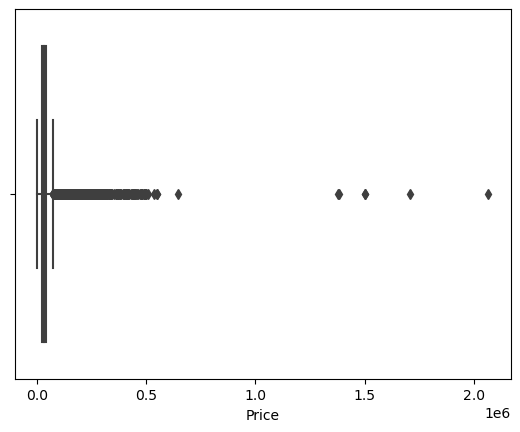

In [19]:
## Plot a boxplot for 'Price' column in dataset

sns.boxplot( x = "Price", data = df)

### **`Observation:`**<br>

In our dataset, we've identified certain values, like 1.5 and 2.0, that stand out from the rest. These values are termed as outliers because they deviate significantly from the typical or expected range of values. Our focus is on detecting outliers in the 'Price' feature. We'll apply a similar analysis to other features in the dataset to ensure a thorough examination.

<Axes: xlabel='Engine_HP'>

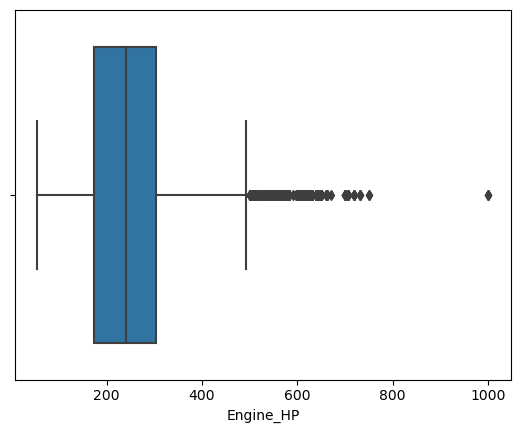

In [20]:
# PLot a boxplot for 'Engine_HP' columns in dataset

sns.boxplot(x ="Engine_HP", data = df)

### ``Observation:``
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

## **`Outliers removal techniques - IQR Method`**

In [21]:
k = 1.5
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)

IQR = Q3 - Q1
L_B = (Q1 - 1.5 * IQR)
U_B = (Q3 + 1.5 * IQR)

df2 = df[(df["Price"] >= L_B)&(df["Price"] <= U_B)]

print(Q1)
print(Q3)
print(IQR)
print(L_B)
print(U_B)



22040.0
43310.0
21270.0
-9865.0
75215.0


In [22]:
# find the shape of df & df2

print(df.shape)
print(df2.shape)

(10781, 8)
(9848, 8)


### <font color='white' style="background-color: black">**Visualising Univariate Distributions:**</font>

### `Histogram:`

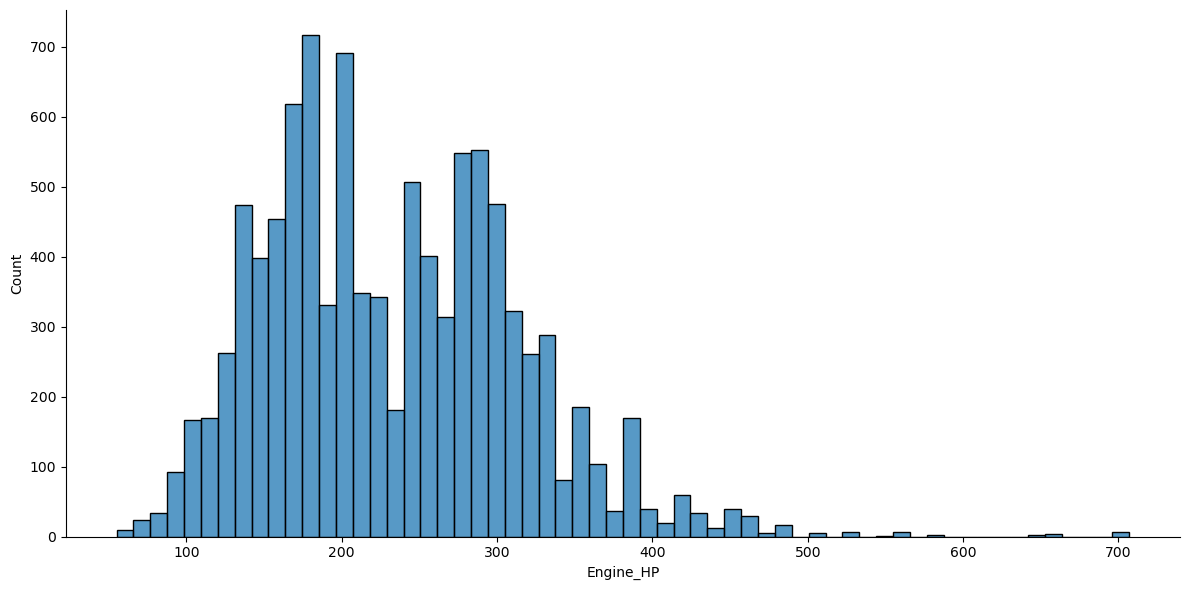

In [23]:
# Ploting distplot for variable HP

sns.displot(df2["Engine_HP"],height = 6, aspect=2)

### **`Observation:`**
The histogram plot for the 'Engine_HP' (Horsepower) feature illustrates a prominent peak around 200, suggesting a significant concentration of values in that range. Additionally, a secondary peak is noticeable near 300, indicating another concentration of values. 

In [24]:
# print all the columns which are of int or float datatype in df2.

df2_num= df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == 'int32')] 

df2_num.head()

,Year,Engine_HP,No_of_Cylinders,Price
0,2011,335,6,46135
1,2011,300,6,40650
2,2011,300,6,36350
3,2011,230,6,29450
4,2011,230,6,34500


In [25]:
# save column names of the above output in variable list
l= df2_num.columns.tolist()
l

['Year', 'Engine_HP', 'No_of_Cylinders', 'Price']

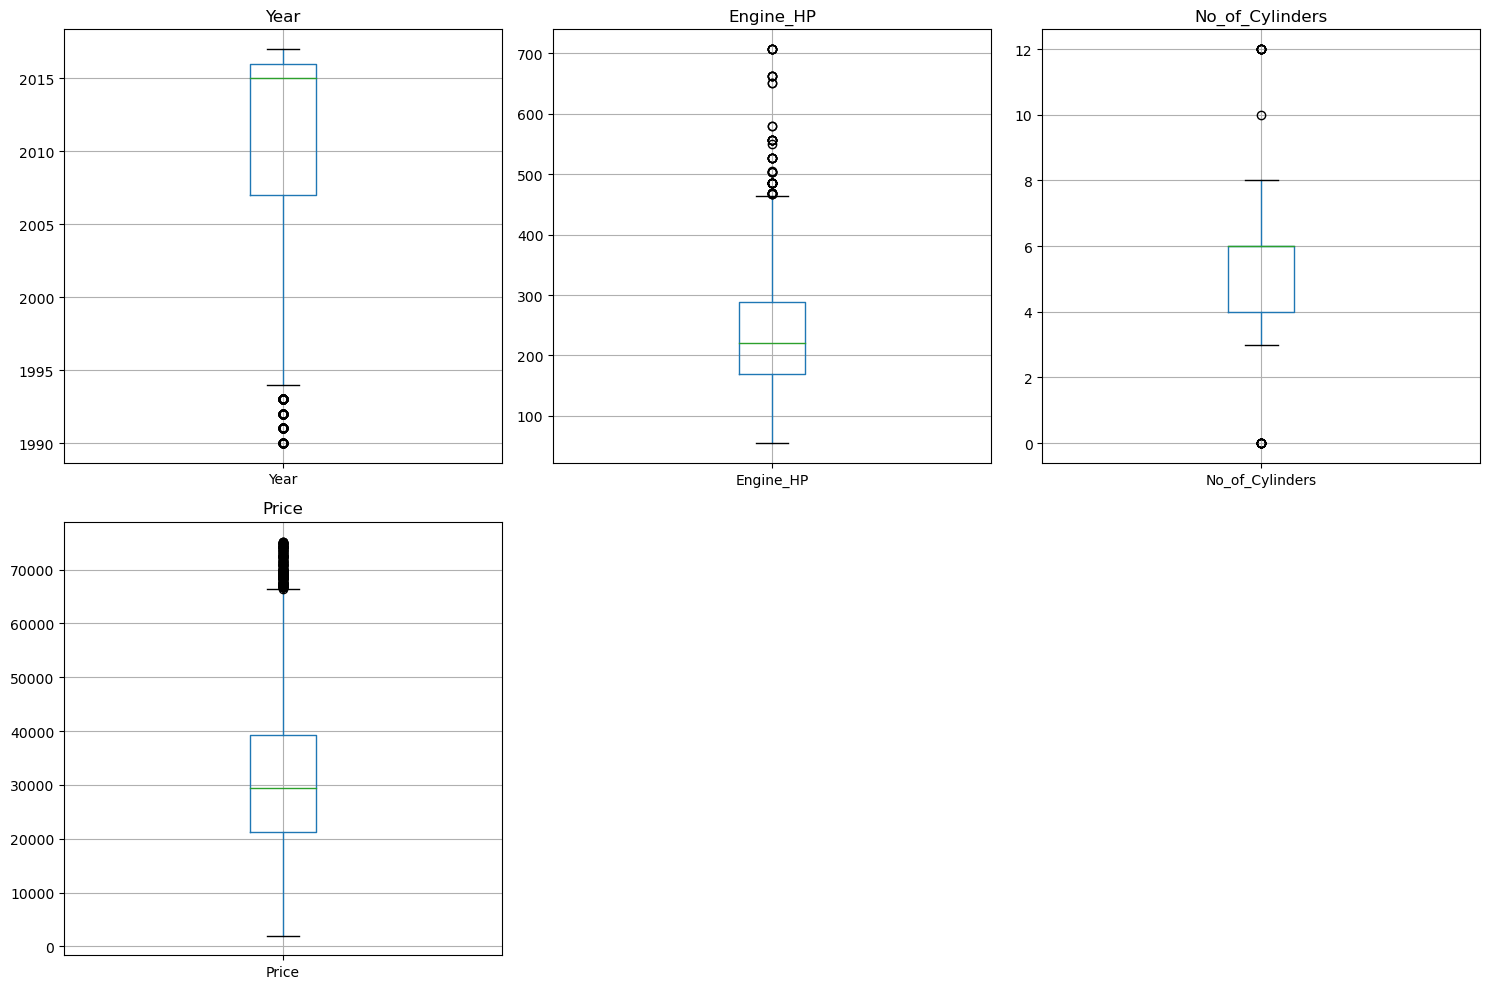

In [26]:
# plot all the columns present in list l together using subplot of dimention (2,3)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(l):
    df2.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    
# Remove empty subplots if there are fewer columns than subplots
for i in range(len(l), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()    

## `Bar Chart Plot`:

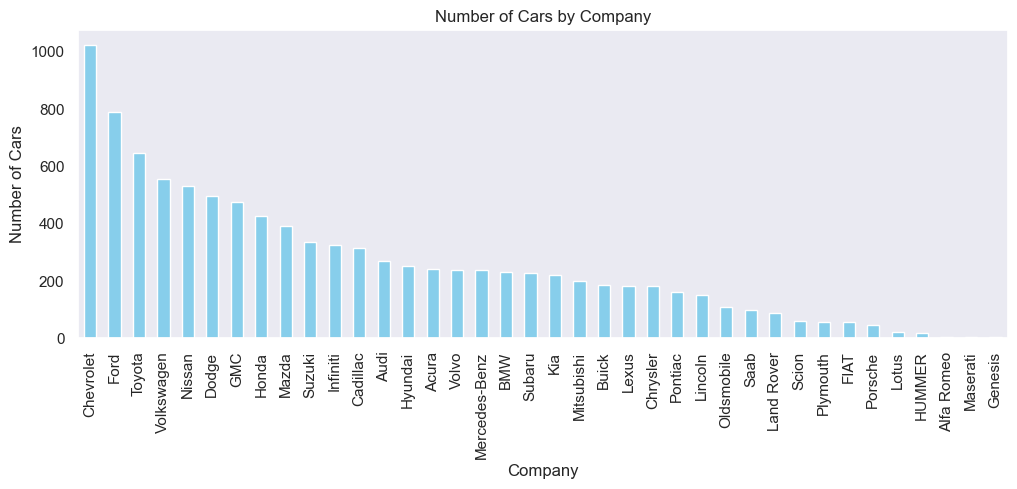

In [27]:
# Plot a bar chart for No.of cars produced by companies

# Set Seaborn style
sns.set(style="dark")

plt.figure(figsize=(12, 4))
df2['Company'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.show()

### **`Observation:`**
Chevrolet has the highest count of cars, with 1024 cars in the dataset. It indicates that Chevrolet is the most represented company in the given data.

## `Line Chart Plot`:

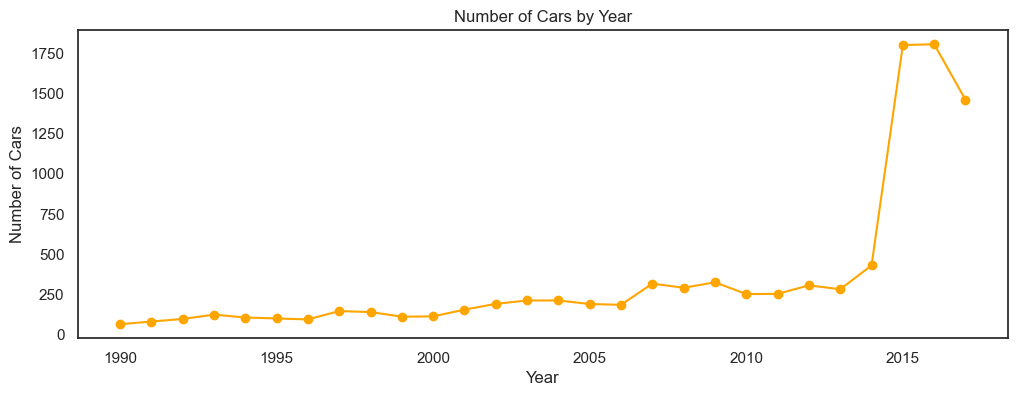

In [28]:
# Plot a Line chart for Number of Cars by Year

# Set Seaborn style
sns.set(style="white")

plt.figure(figsize=(12, 4))
df2['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

## **`Observation:`**<br>
2016 and 2015 have the highest counts of cars, with 1807 and 1802 cars, respectively. This indicates that the dataset is heavily populated with cars from these two years

## `Count Plot`:

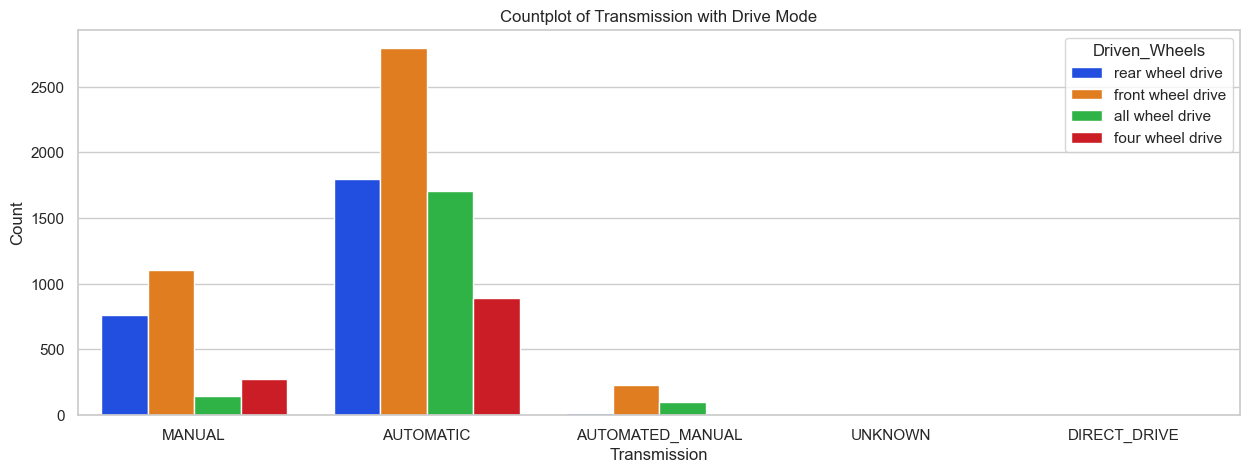

In [29]:
# plot countplot on transmission and drive mode

# Set Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
sns.countplot(x="Transmission", hue='Driven_Wheels', data=df2, palette= sns.color_palette("bright"))
plt.title('Countplot of Transmission with Drive Mode')
plt.xlabel("Transmission")
plt.ylabel('Count')
plt.show()

## **`Observations:`**<br>
* Automatic Transmission is predominantly found in front-wheel-drive cars.
* Manual Transmission is available in all type of drives
* Automated manual Transmission is mostly associated with front-wheel drive, followed by rear-wheel drive.
* Automated manual Transmission is absent in all and four-wheel drives.

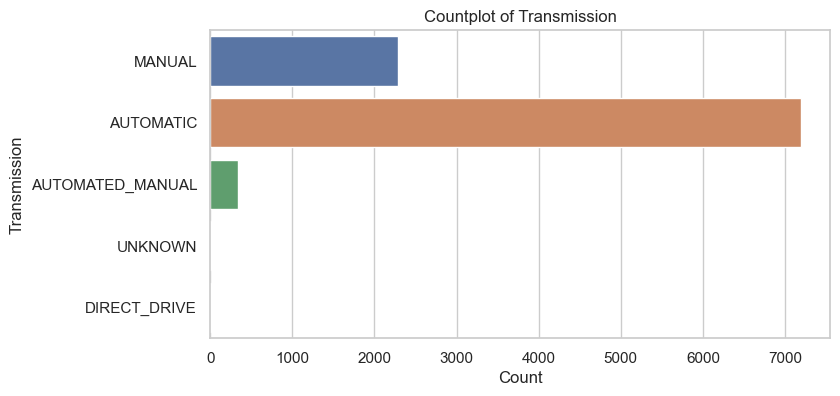

In [30]:
# Plot a bar chart for Countplot of Transmission

# Set Seaborn style
sns.set(style="whitegrid")


plt.figure(figsize=(8, 4))
sns.countplot(y='Transmission', data=df2)
plt.title('Countplot of Transmission')
plt.xlabel('Count')
plt.ylabel('Transmission')
plt.show()

## **`Observations:`**<br>
* AUTOMATIC transmissions dominate, suggesting they are the most prevalent type.
* MANUAL transmissions follow but are notably less common.

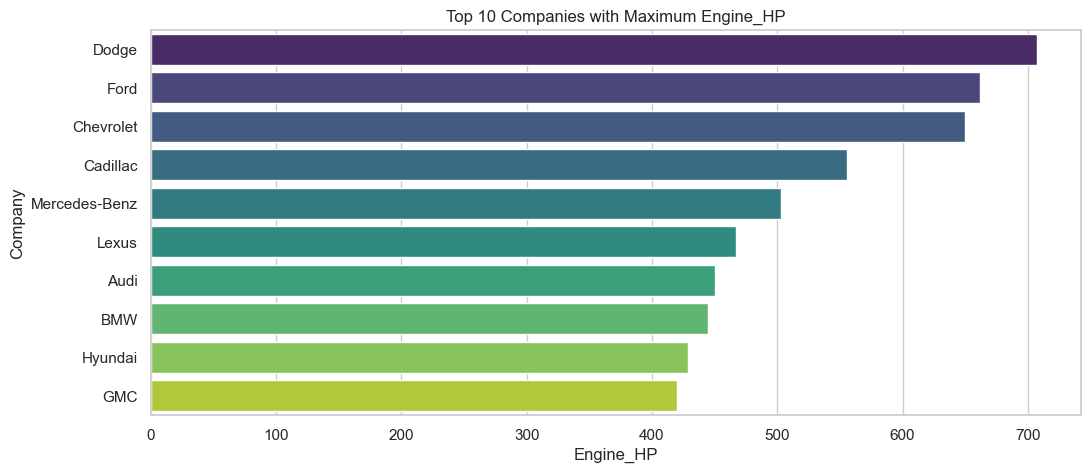

In [31]:
# Get the top 10 companies based on maximum Engine_HP
top_companies = df2.groupby('Company')['Engine_HP'].max().nlargest(10).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(x='Engine_HP', y='Company', data=top_companies, palette='viridis')
plt.title('Top 10 Companies with Maximum Engine_HP')
plt.xlabel('Engine_HP')
plt.ylabel('Company')
plt.show()

## **`Observations:`**<br>
* Dodge Leads the pack with the highest maximum engine HP, represented by a dark purple bar extending beyond 600 HP.

In [32]:
# Lets check "Engine_HP" for "Dodge"

df2[df2["Engine_HP"] >= 700]

,Company,Model,Year,Engine_HP,No_of_Cylinders,Transmission,Driven_Wheels,Price
2452,Dodge,Challenger,2015,707,8,MANUAL,rear wheel drive,58295
2463,Dodge,Challenger,2016,707,8,AUTOMATIC,rear wheel drive,65945
2470,Dodge,Challenger,2017,707,8,MANUAL,rear wheel drive,62495
2481,Dodge,Charger,2015,707,8,AUTOMATIC,rear wheel drive,62295
2489,Dodge,Charger,2016,707,8,AUTOMATIC,rear wheel drive,65945
2500,Dodge,Charger,2017,707,8,AUTOMATIC,rear wheel drive,65945


### <font color='white' style="background-color: black">**Visualising Bivariate Distributions:**</font>

## `Scatter Plot:`

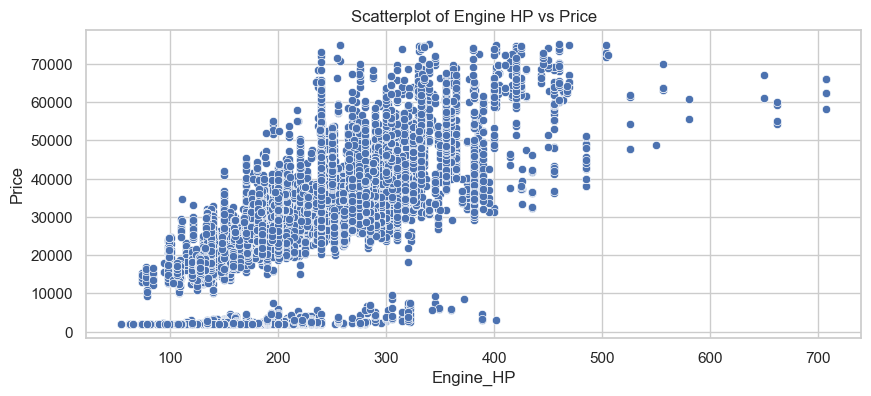

In [33]:
# plot scatterplot on Engine_HP and price

# Set Seaborn style
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(x='Engine_HP', y='Price', data=df2, ax=ax)
plt.title('Scatterplot of Engine HP vs Price')
plt.xlabel('Engine_HP')
plt.ylabel('Price')
plt.show()

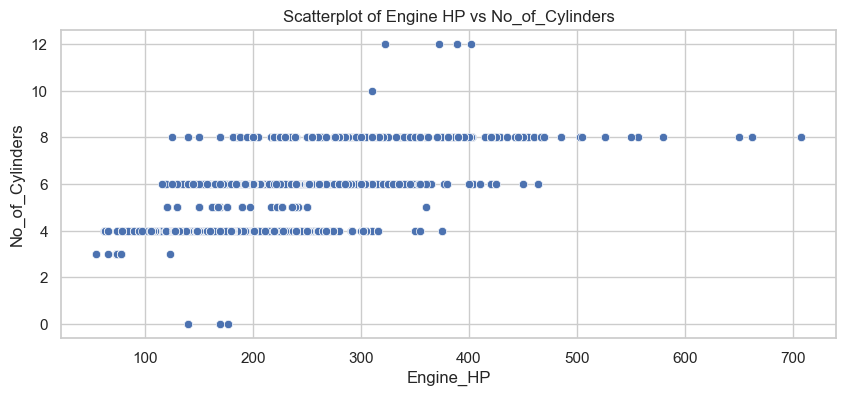

In [34]:
# plot scatterplot on Engine_HP and No_of_Cylinders

# Set Seaborn style
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(x='Engine_HP', y='No_of_Cylinders', data=df2, ax=ax)
plt.title('Scatterplot of Engine HP vs No_of_Cylinders')
plt.xlabel('Engine_HP')
plt.ylabel('No_of_Cylinders')
plt.show()

## `Violin Plot:`

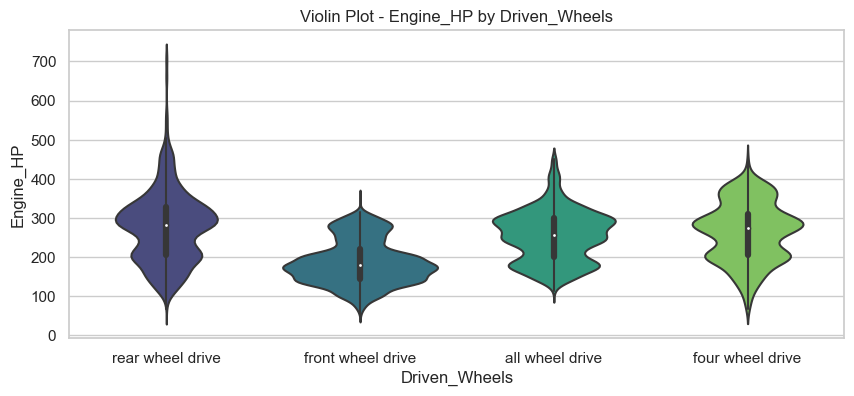

In [35]:
# Plot Violin Plot for Engine_HP by Driven_Wheels
plt.figure(figsize=(10, 4))
sns.violinplot(x='Driven_Wheels', y='Engine_HP', data=df2, palette='viridis')
plt.title('Violin Plot - Engine_HP by Driven_Wheels')
plt.xlabel('Driven_Wheels')
plt.ylabel('Engine_HP')
plt.show()

## **`Observations:`**<br>
* Rear wheel drive cars have maximun HP and majority HP lies in 200 - 300.
* Front wheel drive cars have HP range between 40 - 380 and when compared to other wheel drives, it has less HP
* For all wheel drive cars maximum HP range between 170 - 300
* For rear wheel drive, front wheel drive and four wheel drive cars the HP starts from approx.30

### <font color='white' style="background-color: black">**Multivariate Plots:**</font>

## `Heatmap:`

In [36]:
# heatmaps plot the correlation between the features present in the dataset.
corr = df2.corr()
print(corr)

                     Year  Engine_HP  No_of_Cylinders     Price
Year             1.000000   0.339952        -0.127959  0.646018
Engine_HP        0.339952   1.000000         0.703963  0.730143
No_of_Cylinders -0.127959   0.703963         1.000000  0.322556
Price            0.646018   0.730143         0.322556  1.000000


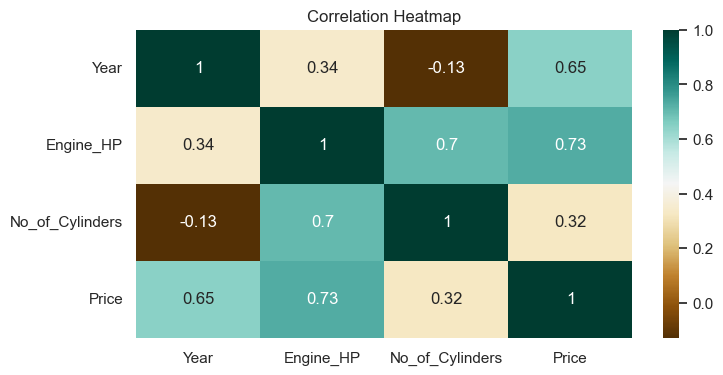

In [37]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='BrBG', annot=True)
plt.title('Correlation Heatmap')
plt.show()


## **`Observations:`**<br>
* There  is a strong correlation between Year and Price.
* There  is a strong correlation between Engine_HP , No_of_Cylinders, Price.
* The strongest correlation is between Engine_HP and Price. So Engine_HP is an important factor in deciding the Price.